# Step1 : Importing Libraries

In [1468]:
#importing the required packages
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')

# Step2: Reading and Understanding Data

In [1470]:
bikesharing_data = pd.read_csv('day.csv')

In [1472]:
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1474]:
# Checking the size of the data
bikesharing_data.shape

(730, 16)

In [1275]:
#Validate dataframe for null and datatype
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1476]:
#Check the details of numerical data
bikesharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1478]:
#Columns of the data
bikesharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1480]:
##Rows of the data
bikesharing_data.size

11680

In [1283]:
#check the datatypes of data
bikesharing_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [1482]:
bikesharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are total 730 rows and 16 columns and no null values in any of the columns.

# Step 3: Cleaning of data

### 3.1 Drop Columns those are not required for us

#### 1. instant : This variable gives the index of records. This  features comes in pandas by default index
#### 2. dteday : This features gives the date of the record. As we have mnth and yr and weekday column already. so for the analysis we will remove this
#### 3. casual and registered : As these values does not help in analyzing the data independently and the same information is provided in cnt column hence dropping

In [1484]:
#drop the above 4 columns
bikesharing_data.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## 3.2 Handling any missing values


In [1486]:
bikesharing_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### There are no missing values

## 3.3 Handle outlier

In [1488]:
bikesharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [1293]:
bikesharing_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

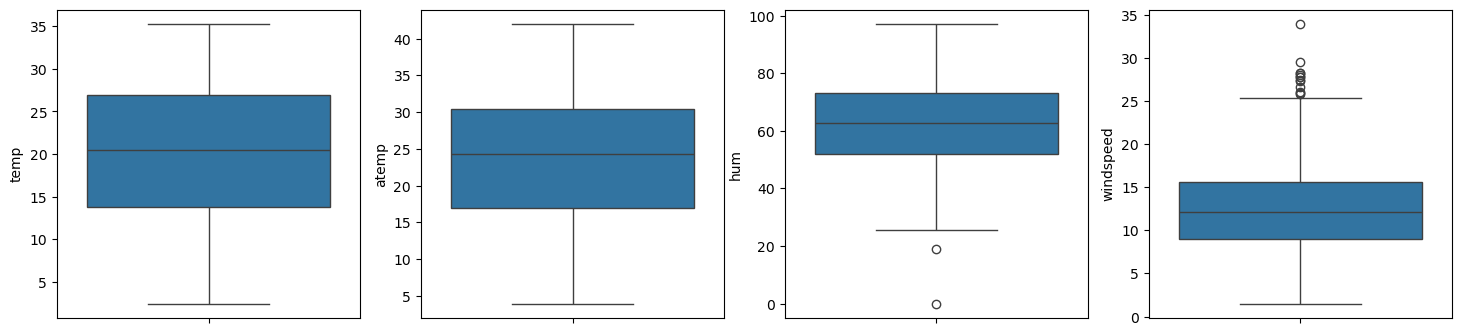

In [1490]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikesharing_data)
    i+=1

#### From the above we can see there is no outliers

<Figure size 1500x1000 with 0 Axes>

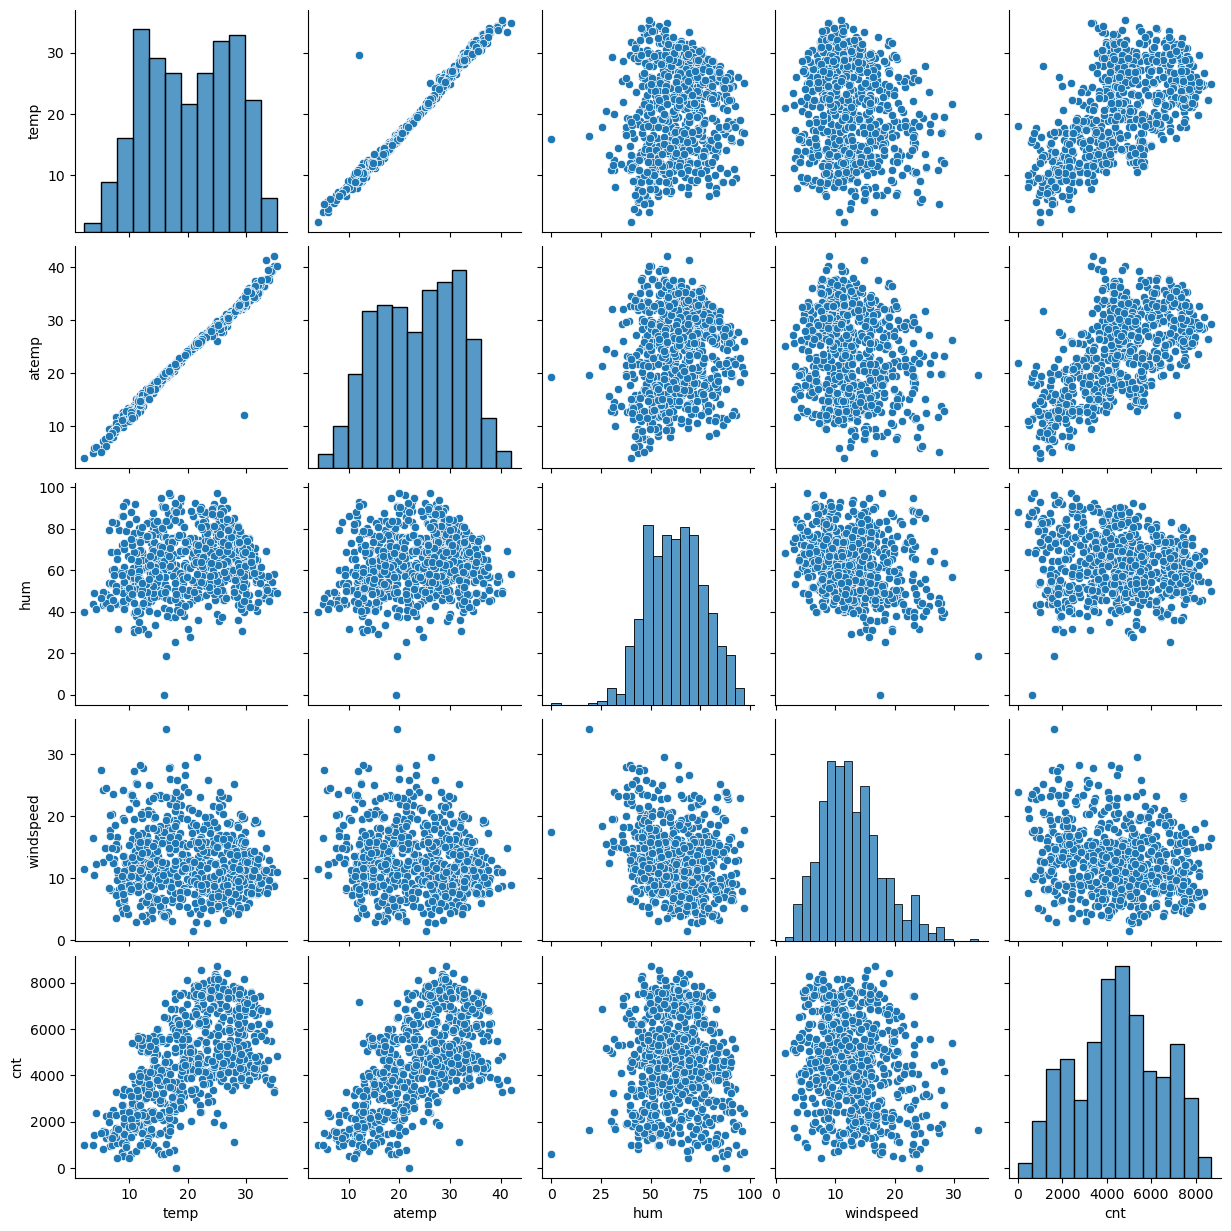

In [1492]:
# visualising the numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# Get the corelations among the variables by plotting multiple scatter plots
plt.figure(figsize=(15,10))
sns.pairplot(bikesharing_data[numerical_vars])
plt.show()

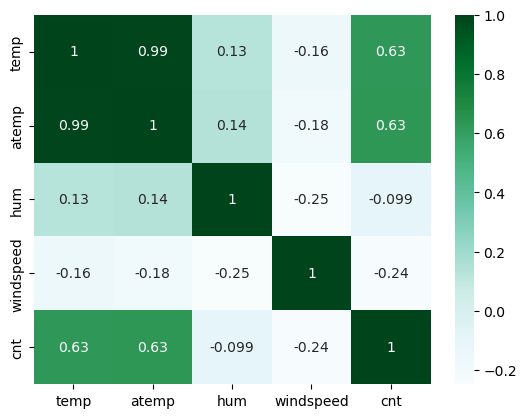

In [1494]:
sns.heatmap(bikesharing_data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

## 3.4 Handle Categorical Variable


In [1496]:
#Convert season, weatherlist, month and wweekday to categorical variables
bikesharing_data['season'] = bikesharing_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikesharing_data['weathersit'] = bikesharing_data['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

bikesharing_data['mnth'] = bikesharing_data['mnth'].map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})

bikesharing_data['weekday'] = bikesharing_data['weekday'].map({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1303]:
bikesharing_data['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [681]:
bikesharing_data['weathersit'].value_counts()

weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64

In [334]:
bikesharing_data['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [1094]:
bikesharing_data['weekday'].value_counts()

weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

In [1307]:
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 3.5 Analyze Categorical variables with target variables

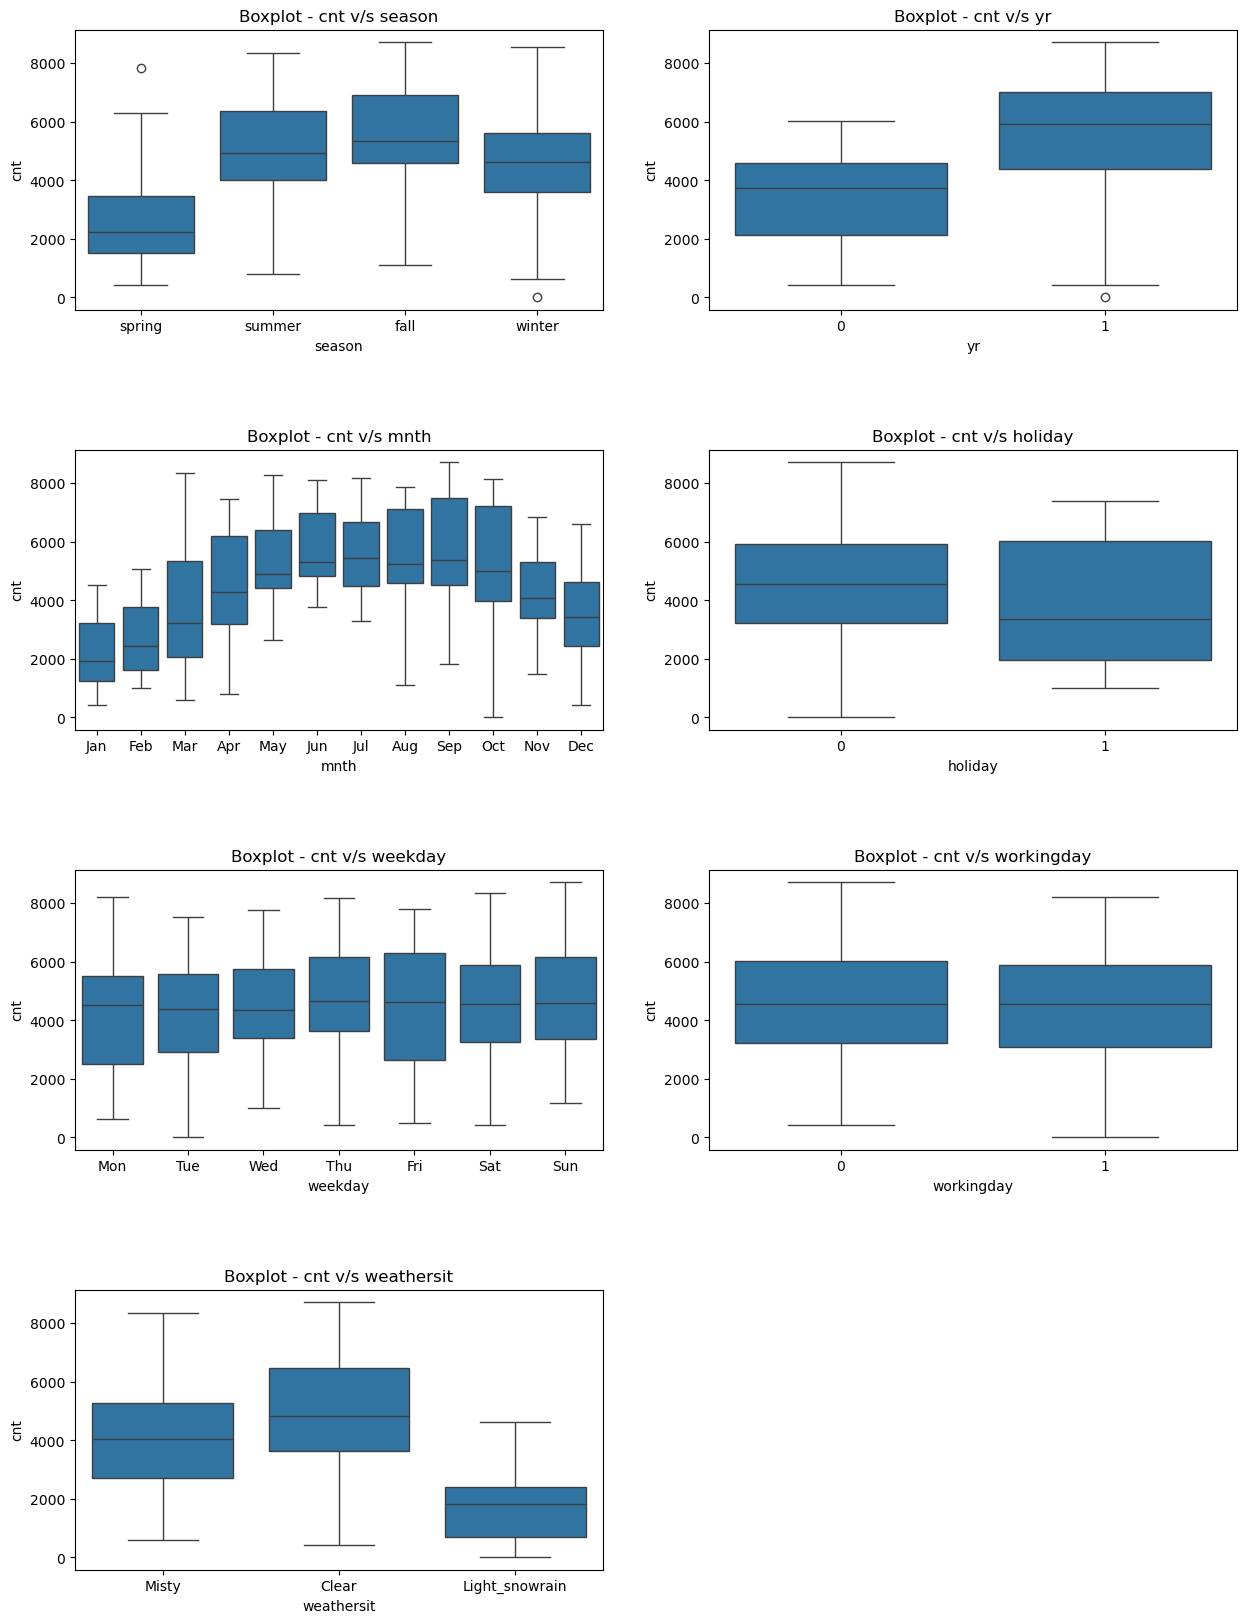

In [1498]:
# Boxplot for categorical variable for analyzing the data
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(categorical_vars):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot - cnt v/s " + col)
    sns.boxplot(x=col, y='cnt', data=bikesharing_data);

### Inference
#### Here are many observations can be found from the above box plots

1. More bikes are rented in summer and fall
2. We observed that  demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

## Step 4 : Data preparation

### 4.1 Creating dummy variables for Linear Regression

In [1500]:
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Observations

1. we need to convert categorical variables having more than two levels to dummy variables, which are 'season', 'mnth', 'weekday', 'weathersit'

In [1502]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1504]:
bikesharing_data = pd.get_dummies(data=bikesharing_data,columns=["season","mnth","weekday"],drop_first=True, dtype=int)
bikesharing_data = pd.get_dummies(data=bikesharing_data,columns=["weathersit"], dtype=int)


In [1341]:
bikesharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [1343]:
bikesharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [1506]:
bikesharing_data.isnull().sum()

yr                           0
holiday                      0
workingday                   0
temp                         0
atemp                        0
hum                          0
windspeed                    0
cnt                          0
season_spring                0
season_summer                0
season_winter                0
mnth_Aug                     0
mnth_Dec                     0
mnth_Feb                     0
mnth_Jan                     0
mnth_Jul                     0
mnth_Jun                     0
mnth_Mar                     0
mnth_May                     0
mnth_Nov                     0
mnth_Oct                     0
mnth_Sep                     0
weekday_Mon                  0
weekday_Sat                  0
weekday_Sun                  0
weekday_Thu                  0
weekday_Tue                  0
weekday_Wed                  0
weathersit_Clear             0
weathersit_Light_snowrain    0
weathersit_Misty             0
dtype: int64

## Step 5: Splitting Data into Train-Test and Scaling

In [1508]:
#y to contain only target variable
y=bikesharing_data.pop('cnt')

#X is all remainign variable also our independent variables
X=bikesharing_data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [1347]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1510]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Scaling all the numerical columns

In [1512]:
# Creating a list of numerical columns (not including the ones with Yes-No and Dummy variables)

num_vars = ['temp','atemp','hum','windspeed']

In [1514]:
# Scale the data using MinMax scaling

scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.626223,0.029354,0.344423
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.484280,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1516]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [1518]:
X_train[num_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000
mean,0.537386,0.513133,0.650333,0.320844
std,0.225640,0.212202,0.145741,0.169639
min,0.000000,0.000000,0.000000,0.000000
25%,0.341151,0.332910,0.538858,0.199179
50%,0.542077,0.529300,0.653499,0.298098
75%,0.735215,0.688457,0.754401,0.414438
90%,0.830744,0.781260,0.839845,0.545476
95%,0.877991,0.820626,0.892657,0.651086
99%,0.949119,0.884022,0.952511,0.788379


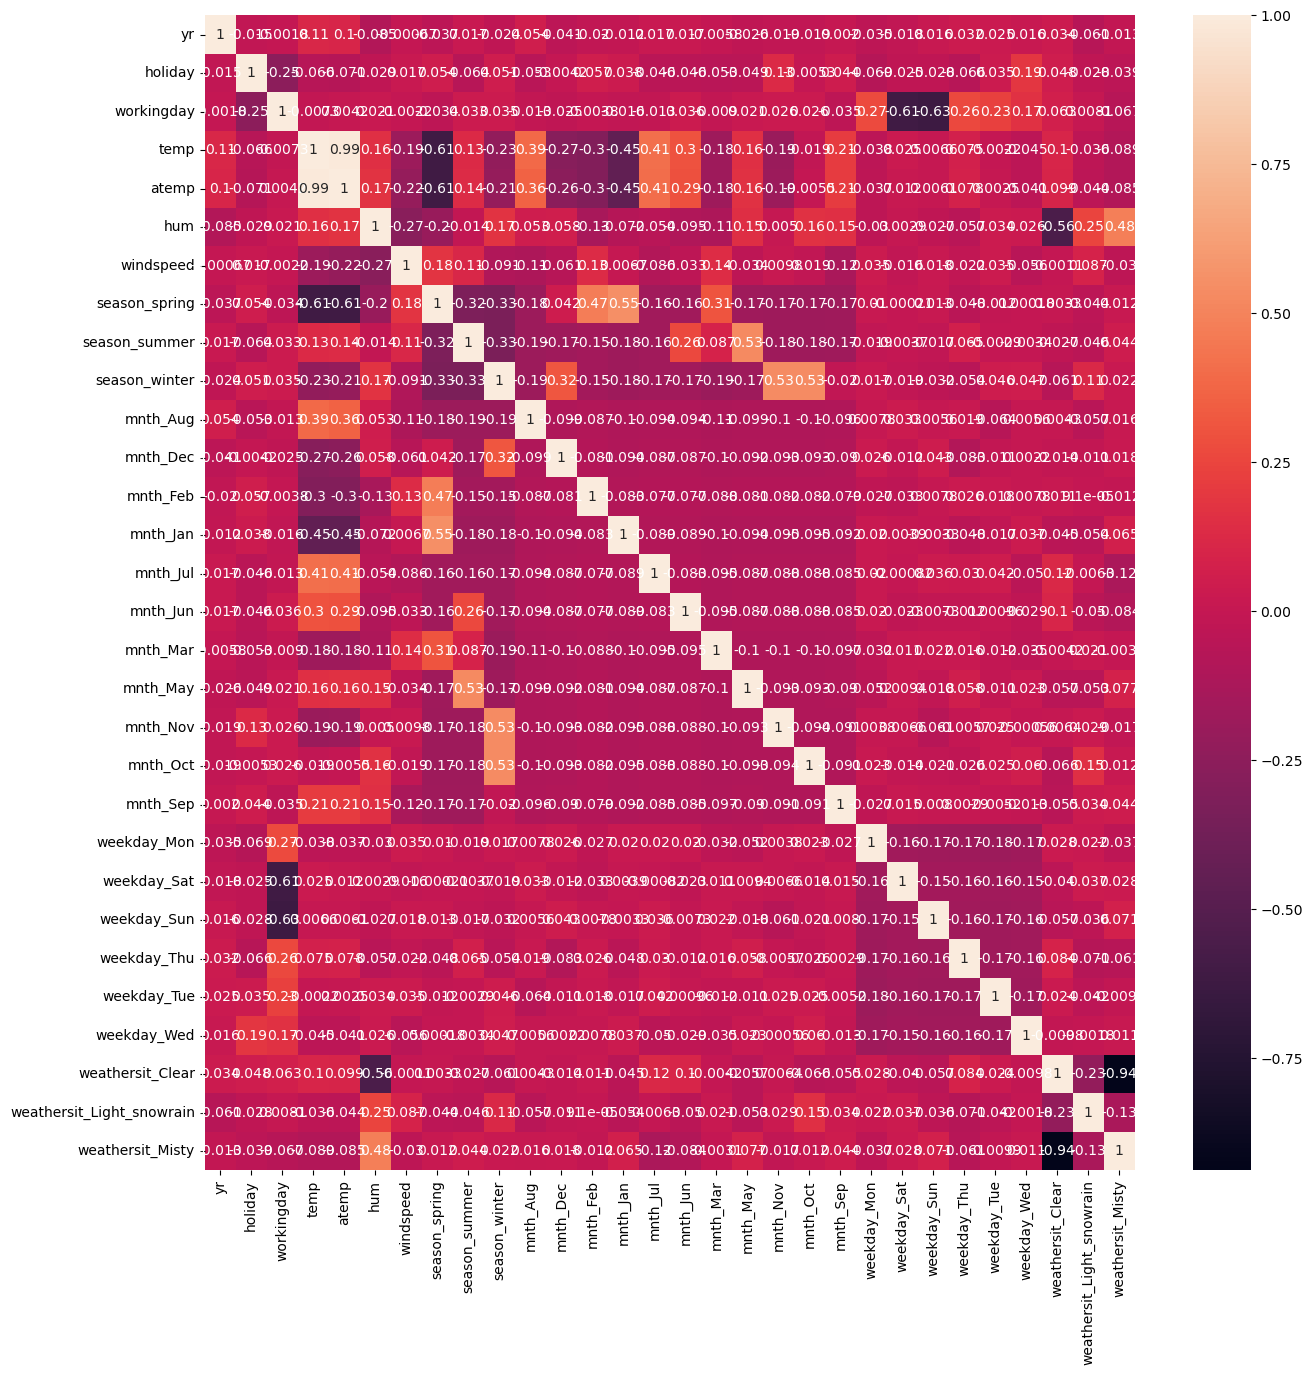

In [1520]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

### Observations
1. As the values in each column above are gradually increasing, we can conclude that there are no outliers

## Model Building Using RFE

In [1522]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin)

In [1524]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1367]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 10),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 12),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [1526]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [1528]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [1530]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Clear', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [1532]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [1534]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Clear', 'weathersit_Light_snowrain',
       'weathersit_Misty']]

In [1536]:
X_train_rfe.shape

(511, 15)

## 6. Build Model

### 6.1 Model 1 - Start with all variables selected by RFE

In [1538]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Clear', 'weathersit_Light_snowrain',
       'weathersit_Misty']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          1.49e-189
Time:                        12:15:34   Log-Likelihood:                -4122.3
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

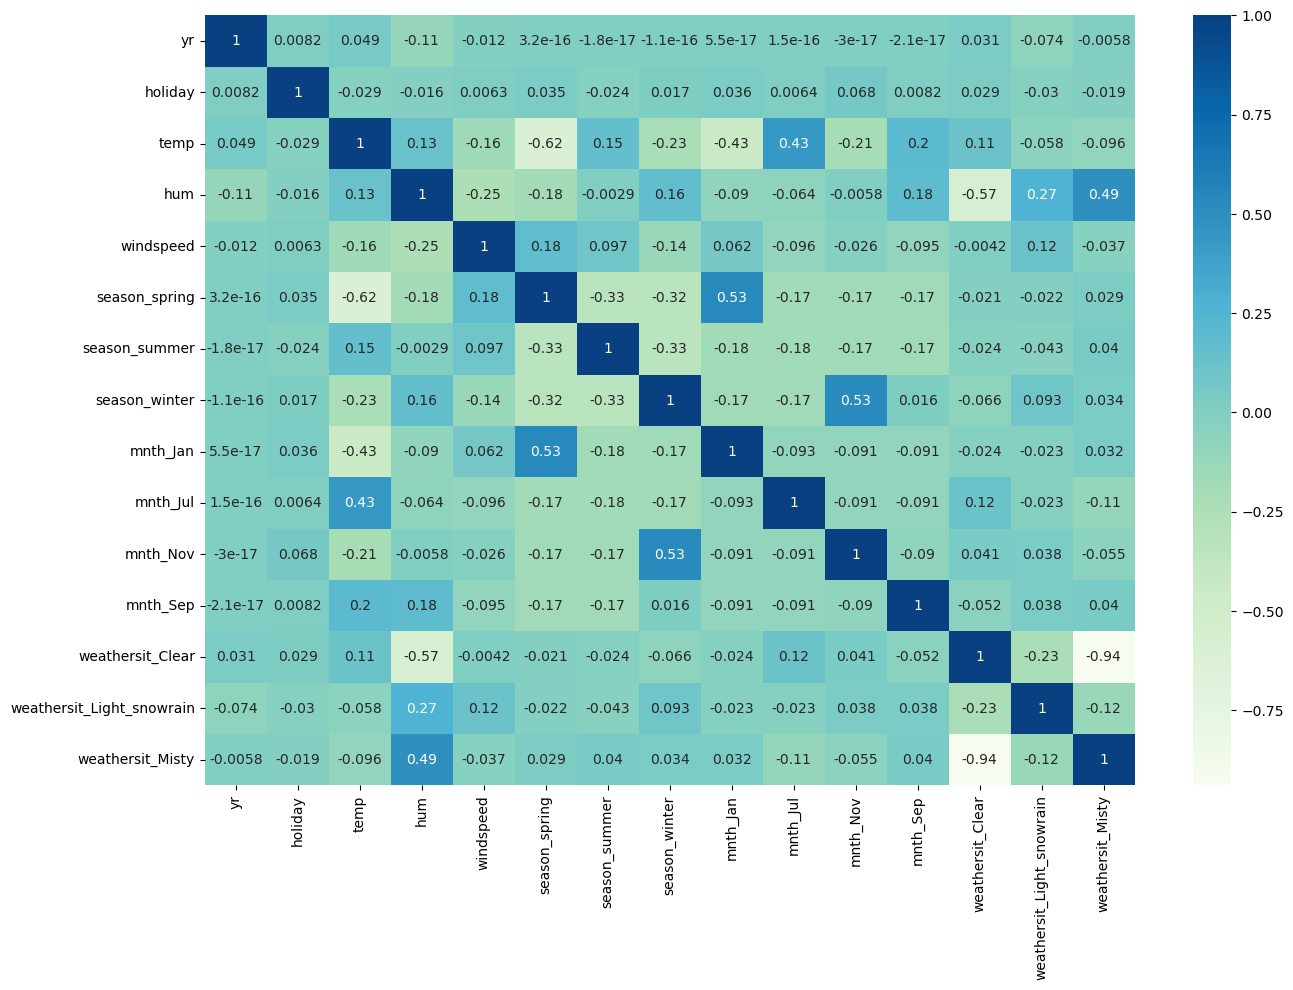

In [1383]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikesharing_data[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Clear', 'weathersit_Light_snowrain',
       'weathersit_Misty']].corr(), cmap='GnBu', annot=True)
plt.show()

### Model 2

In [1540]:
# As weathersit_Clear shows high VIF values hence we can drop it
# Dropping the variable weathersit_Clear as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          1.49e-189
Time:                        12:15:38   Log-Likelihood:                -4122.3
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 3

In [1542]:
# As hum shows high VIF values hence we can drop it
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.23e-186
Time:                        12:16:02   Log-Likelihood:                -4132.6
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     497   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### VIF values seems to be good now. But we will see if we can reduce further ?

### Model 4

In [1544]:
# We can remove mnth_Nov as it has high p value

cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul',
       'mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          3.46e-187
Time:                        12:16:21   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 5

In [1546]:
# We can remove mnth_Jan as it has high p value

cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.09e-187
Time:                        12:16:35   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 6

In [1548]:
# We can remove mnth_Jul as it has high p value

cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter','mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          6.20e-187
Time:                        12:16:51   Log-Likelihood:                -4139.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     500   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 7

In [1550]:
# We can remove windspeed as it has high VIF value

cols7 = ['yr', 'holiday', 'temp', 'season_spring',
       'season_summer', 'season_winter','mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']
build_model(cols7)
get_vif(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          5.26e-181
Time:                        12:17:09   Log-Likelihood:                -4156.7
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observations
1. VIF value now seems to be good as it came below 5.
2. We can cosider the above model as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
3. F-Statistics value of 255 (which is greater than 1) and the p-value of 5.26e-181 i.e almost equals to zero, states that the overall model is significant
4. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.
5. Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.82 Hence we finalize this model to use further

In [1553]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [1555]:
#Let us build the finalmodel using sklearn
cols7 =  ['yr', 'holiday', 'temp', 'season_spring',
       'season_summer', 'season_winter','mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']


#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols7],y_train)
print(lr.intercept_,lr.coef_)

1245.281283954721 [ 2031.326427    -865.7426348   4261.75561421  -559.61540602
   456.05551627   844.41637463   827.82278906 -2611.89767159
  -673.53483592]


## Step 7. Model Evaluation

### 7.1 Residucal Analysis

In [1557]:
y_train_pred = lr.predict(X_train[cols7])

In [1559]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

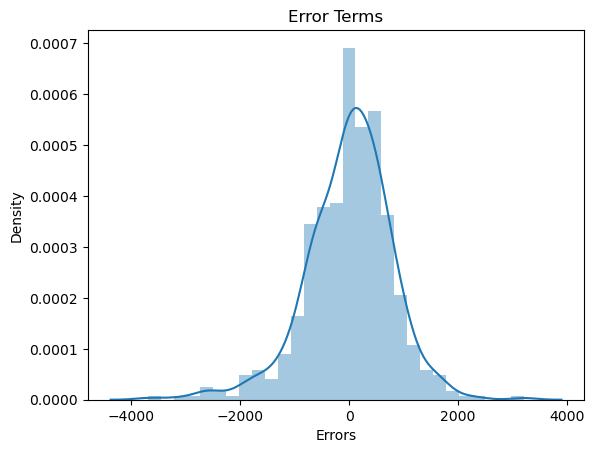

In [938]:
plot_res_dist(y_train, y_train_pred)

### Errors are normally distribured here with mean 0. So everything seems to be fine

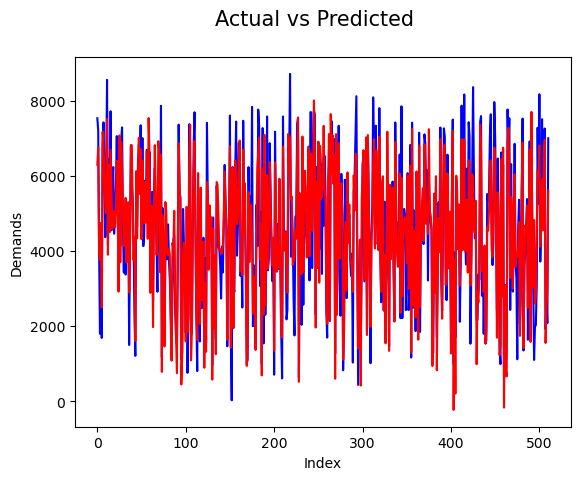

In [1561]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted result following almost the same pattern so this model seems ok


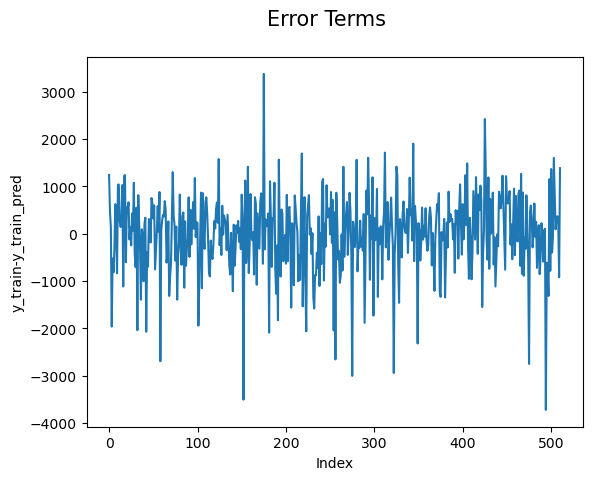

In [1563]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [1565]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8212699938693997

## Observations

#### R2 Same as we obtained for our final model

## 7.2 Linearity Check

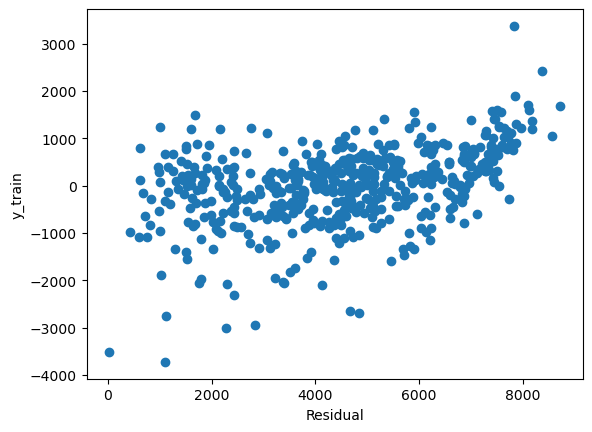

In [1567]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [1569]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [1571]:
#Columns from our final model
cols7 = ['yr', 'holiday', 'temp', 'season_spring',
       'season_summer', 'season_winter','mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols7])

### 7.4 R-Squared value for train predictions

In [1573]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.808980636769386

### 7.5 Homoscedacity

#### Observations

R2 value for predictions on test data(0.821) is almost same as R2 value oftrain data which is (0.808). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

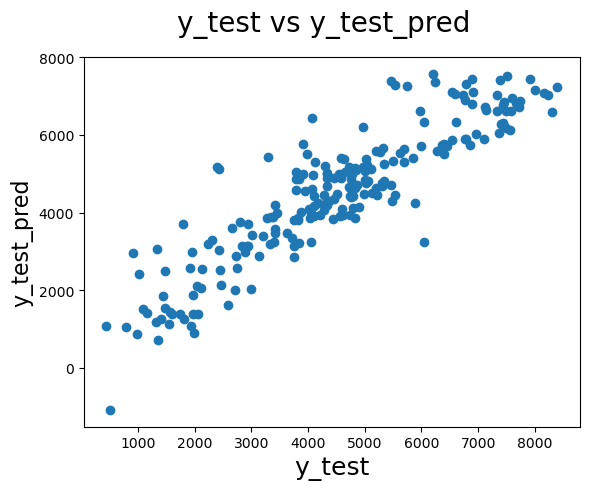

In [1596]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### 7.6 Cross-verifying the above conclusion using a qq-plot as well

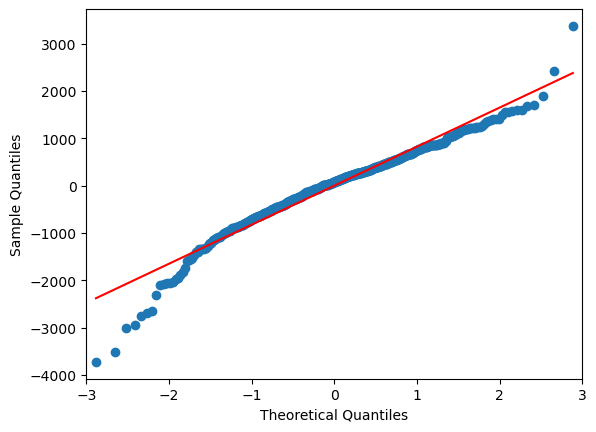

In [1592]:
# scatter plot for the check
residual = (y_train - y_train_pred)
sm.qqplot(residual, line='s', ax=plt.gca())
plt.show()

### Observations
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

# 8. Making Predictions

In [763]:
# Checking data before scaling
bikeSharing_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### 8.1 Intrepretting the Model
Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [1605]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols =['yr', 'holiday', 'temp', 'season_spring',
       'season_summer', 'season_winter','mnth_Sep','weathersit_Light_snowrain',
       'weathersit_Misty']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          5.26e-181
Time:                        12:34:40   Log-Likelihood:                -4156.7
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [1613]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,10))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,4261.755614
1,yr,2031.326427
0,const,1245.281284
6,season_winter,844.416375
7,mnth_Sep,827.822789
5,season_summer,456.055516
4,season_spring,-559.615406
9,weathersit_Misty,-673.534836
2,holiday,-865.742635


In [ ]:
### By using the above scatter plot and the table , We can see that the equation of our best fitted line is:
cnt = 

### Interepretation of results

#### Analysing the above model, the comapany should focus on the following features:
1. Company should focus on expanding business during Spring.
2. Company should focus on expanding business during September.
3. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


## Conclusion
Demand of bikes depend on year, holiday, temp, Sep, Light_snowrain, Misty, spring, summer and winter.